In [1]:
import numpy as np
from numpy import dot
from numpy.linalg import norm
import math, cmath

### Base class

In [2]:
class hdv:
    dim=0
    def __init__(self, dim=0):
        self.dim = dim
        
    def get_rv(self):
        pass
    
    def bind(self, v1, v2):
        pass
    
    def bundle(self, arr_v):
        pass
    
    def similarity(self, v1, v2):
        pass
    
    def set_dim(self, dim):
        self.dim = dim

### MAP-C

In [3]:
class MAP_C(hdv):
    upper = 1
    lower = -1
    def get_rv(self):
        return np.random.uniform(self.lower, self.upper, self.dim)
    
    def bind(self, v1, v2):
        return np.multiply(v1, v2)
    
    def unbind(self, v1, v2):
        return np.multiply(v1, v2)
    
    def bundle(self, arr_v):
        rslt = np.zeros(self.dim)
        for v in arr_v:
            rslt = np.add(rslt, v)
        
        for i in range(len(rslt)):
            if (rslt[i] > self.upper):
                rslt[i] = self.upper
            elif (rslt[i] < self.lower):
                rslt[i] = self.lower
        
        return rslt
    
    def similarity(self, a, b):
        return dot(a, b)/(norm(a)*norm(b))

### MAP-I

In [4]:
class MAP_I(hdv):
    upper = 1
    lower = -1
    def get_rv(self):
        return np.random.binomial(1, 0.5, self.dim) * 2 - 1
    
    def bind(self, v1, v2):
        return np.multiply(v1, v2)
    
    def unbind(self, v1, v2):
        return np.multiply(v1, v2)
    
    def bundle(self, arr_v):
        rslt = np.zeros(self.dim)
        for v in arr_v:
            rslt = np.add(rslt, v)
        
        for i in range(len(rslt)):
            if (rslt[i] > self.upper):
                rslt[i] = self.upper
            elif (rslt[i] < self.lower):
                rslt[i] = self.lower
        
        return rslt
    
    def similarity(self, a, b):
        return dot(a, b)/(norm(a)*norm(b))

### HRR

In [5]:
class HRR(hdv):
    def get_rv(self):
        return np.random.normal(0.0, math.sqrt(1.0/self.dim), self.dim)
    
    def bind(self, v1, v2):
        rslt = []
        for j in range(self.dim):
            c_j = 0
            for k in range(self.dim):
                c_j += v2[k] * v1[(j-k)%self.dim]
            rslt.append(c_j)
            
        rslt_np = np.array(rslt)
        rslt_norm = rslt_np / np.linalg.norm(rslt_np)
        return rslt_norm
            
    
    def unbind(self, v1, v2):
        rslt = []
        for j in range(self.dim):
            c_j = 0
            for k in range(self.dim):
                c_j += v1[k] * v2[(j+k)%self.dim]
            rslt.append(c_j)
        
        rslt_np = np.array(rslt)
        rslt_norm = rslt_np / np.linalg.norm(rslt_np)
        return rslt_norm
    
    def bundle(self, arr_v):
        rslt = np.zeros(self.dim)
        for v in arr_v:
            rslt = np.add(rslt, v)
        
        rslt_np = np.array(rslt)
        rslt_norm = rslt_np / np.linalg.norm(rslt_np)
        return rslt_norm
    
    def similarity(self, a, b):
        return dot(a, b)/(norm(a)*norm(b))

### FHRR

In [6]:
class FHRR(hdv):
    upper = math.pi
    lower = -math.pi
    def get_rv(self):
        angles = np.random.uniform(self.lower, self.upper, self.dim)
        elems = [ cmath.exp(1j*theta) for theta in angles ]
        return np.array(elems)
    
    def bind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 + a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    def unbind(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        sum_rslt =  [ cmath.exp((a1 - a2) * 1j) for a1, a2 in zip(angles_v1, angles_v2) ]
        return np.array(sum_rslt)
    
    def bundle(self, arr_v):
        rslt = np.zeros(self.dim)
        for v in arr_v:
            rslt = np.add(rslt, v)
        
        rslt_int = [ cmath.exp((cmath.polar(c)[1])*1j) for c in rslt]
        
        return np.array(rslt_int)
    
    def similarity(self, v1, v2):
        angles_v1 = [cmath.polar(c)[1] for c in v1]
        angles_v2 = [cmath.polar(c)[1] for c in v2]
        
        sum_angles = 0
        for i in range(self.dim):
            sum_angles += (cmath.cos(angles_v1[i].real - angles_v2[i].real)).real
            
        return sum_angles / self.dim

### Experiment 1

Draw Random vectors and check for similarity
1. MAP_C
2. MAP_I
3. HRR
4. FHRR

In [7]:
dim = 1000
n_rv = 20

obj = MAP_C(dim)

In [8]:
rvs = []
for i in range(n_rv):
    rvs.append(obj.get_rv())

sim_scores = []
for i in range(n_rv):
    sim_scores.append([])

for i in range(n_rv):
     for j in range(n_rv):
            score = obj.similarity(rvs[i], rvs[j])
            sim_scores[i].append(score)

sim_scores = np.array(sim_scores)
# print(sim_scores)

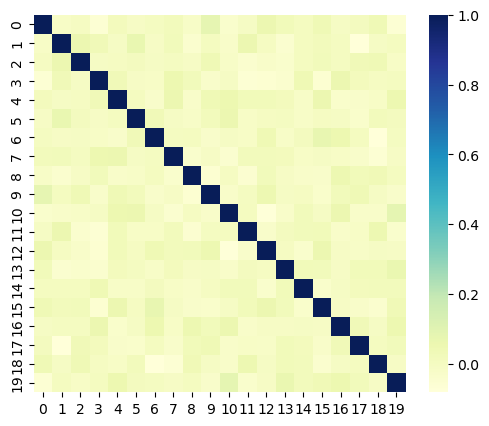

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

figure(figsize=(6, 5), dpi=100)
# plt.imshow(sim_scores, cmap='hot', interpolation='nearest')
ax = sns.heatmap(sim_scores, cmap="YlGnBu")
plt.show()

Let's find out the behavior of the average similarity of RVs against dimensions

In [10]:
n_rvs = 100

obj = HRR()
d_start = 1
d_end = 1000

dim_similarity = []

VSA_algo = [MAP_C(), MAP_I(), HRR(), FHRR()]

for i in range(len(VSA_algo)):
    dim_similarity.append([])

for k in range(len(VSA_algo)):
    obj = VSA_algo[k]
    for dim in range(d_start, d_end):
        obj.set_dim(dim)
        rvs = []
        for i in range(n_rvs):
            rvs.append(obj.get_rv())

        sim_sum = 0
        count = 0
        for i in range(1, n_rvs):
            sim_sum += obj.similarity(rvs[0], rvs[i])
            count += 1

        avg_sim = abs(sim_sum / count)
        dim_similarity[k].append(avg_sim)
    

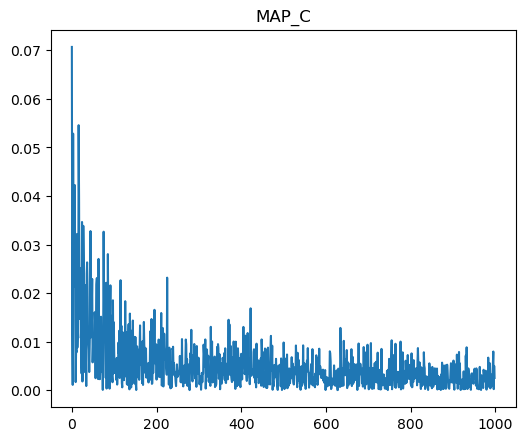

In [11]:
figure(figsize=(6, 5), dpi=100)
plt.plot(dim_similarity[0])
plt.title("MAP_C")
plt.show()

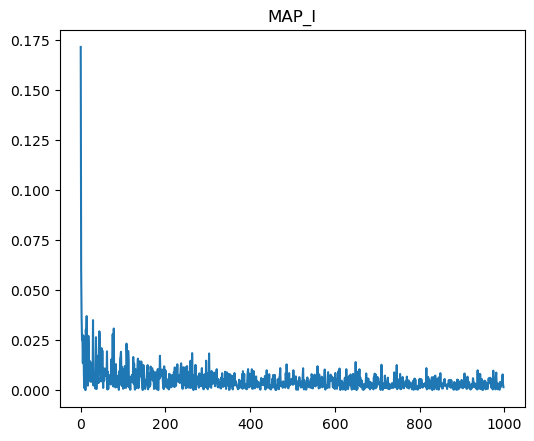

In [12]:
figure(figsize=(6, 5), dpi=100)
plt.plot(dim_similarity[1])
plt.title("MAP_I")
plt.show()

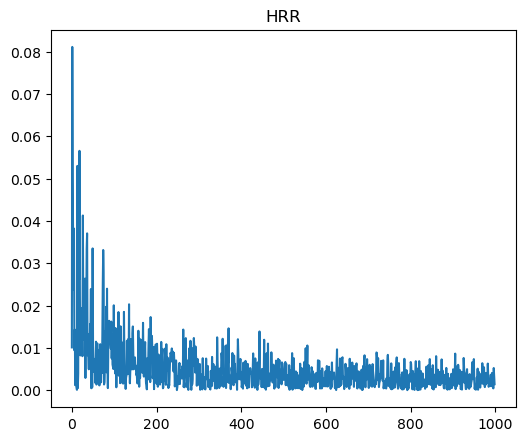

In [13]:
figure(figsize=(6, 5), dpi=100)
plt.plot(dim_similarity[2])
plt.title("HRR")
plt.show()

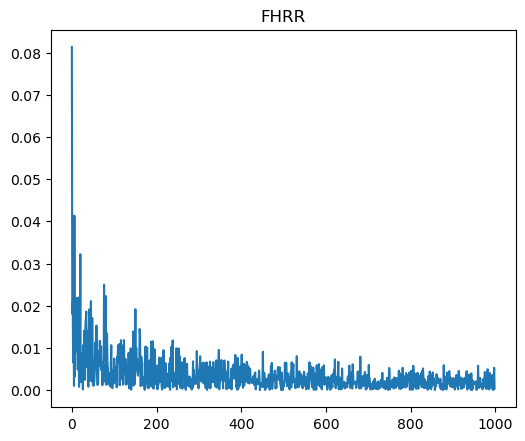

In [14]:
figure(figsize=(6, 5), dpi=100)
plt.plot(dim_similarity[3])
plt.title("FHRR")
plt.show()

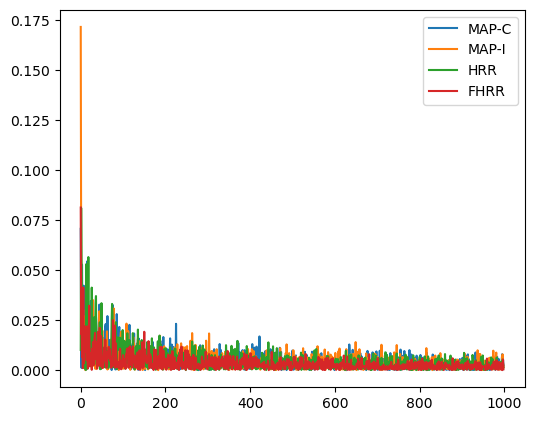

In [15]:
figure(figsize=(6, 5), dpi=100)
plt.plot(dim_similarity[0], label="MAP-C")
plt.plot(dim_similarity[1], label="MAP-I")
plt.plot(dim_similarity[2], label="HRR")
plt.plot(dim_similarity[3], label="FHRR")
plt.legend()
plt.show()

### Experiment 2

Similarity decay when you bundle more and more random vectors

In [30]:
dim = 1000
n_rvs = 20

obj = HRR(dim)

In [31]:
rvs = []
for i in range(n_rvs):
    rvs.append(obj.get_rv())

similarity = []
summation_vec = rvs[0]

for i in range(len(rvs)):
    summation_vec = obj.bundle(rvs[:i+1])
    sim = obj.similarity(summation_vec, rvs[0])
    similarity.append(sim)
    

In [ ]:
plt.plot(similarity)

In [40]:
### Proper experiment
dim = 1000
n_rvs = 20

vsa_similarity = []

VSA_algo = [MAP_C(), MAP_I(), HRR(), FHRR()]

for i in range(len(VSA_algo)):
    vsa_similarity.append([])

for k in range(len(VSA_algo)):
    obj = VSA_algo[k]
    obj.set_dim(dim)
    rvs = []
    for i in range(n_rvs):
        rvs.append(obj.get_rv())
        
    summation_vec = rvs[0]
    
    for i in range(len(rvs)):
        summation_vec = obj.bundle(rvs[:i+1])
        sim = obj.similarity(summation_vec, rvs[0])
        vsa_similarity[k].append(sim)
    

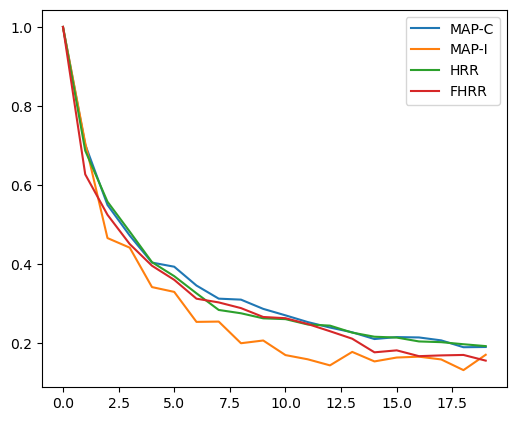

In [41]:
figure(figsize=(6, 5), dpi=100)
plt.plot(vsa_similarity[0], label="MAP-C")
plt.plot(vsa_similarity[1], label="MAP-I")
plt.plot(vsa_similarity[2], label="HRR")
plt.plot(vsa_similarity[3], label="FHRR")
plt.legend()
plt.show()

### 